In [1]:
# Ojective:
#Predicting Heart Disease using Logistic Regression

In [3]:
# Import Libraries:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
# Data Preparation:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/framingham.csv'
heart_df= pd.read_csv(url)
heart_df.drop(['education'],axis=1,inplace=True)

In [18]:
# 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
heart_df.rename(columns={'male':'Gender_male'}, inplace=True)

In [7]:
# Missing Values:
heart_df.isnull().sum()

Gender_male          0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count = count+1
print('Total number of rows with missing values is', count)
print('Since it is only', round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is 489
Since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [12]:
heart_df.dropna(axis=0, inplace=True)

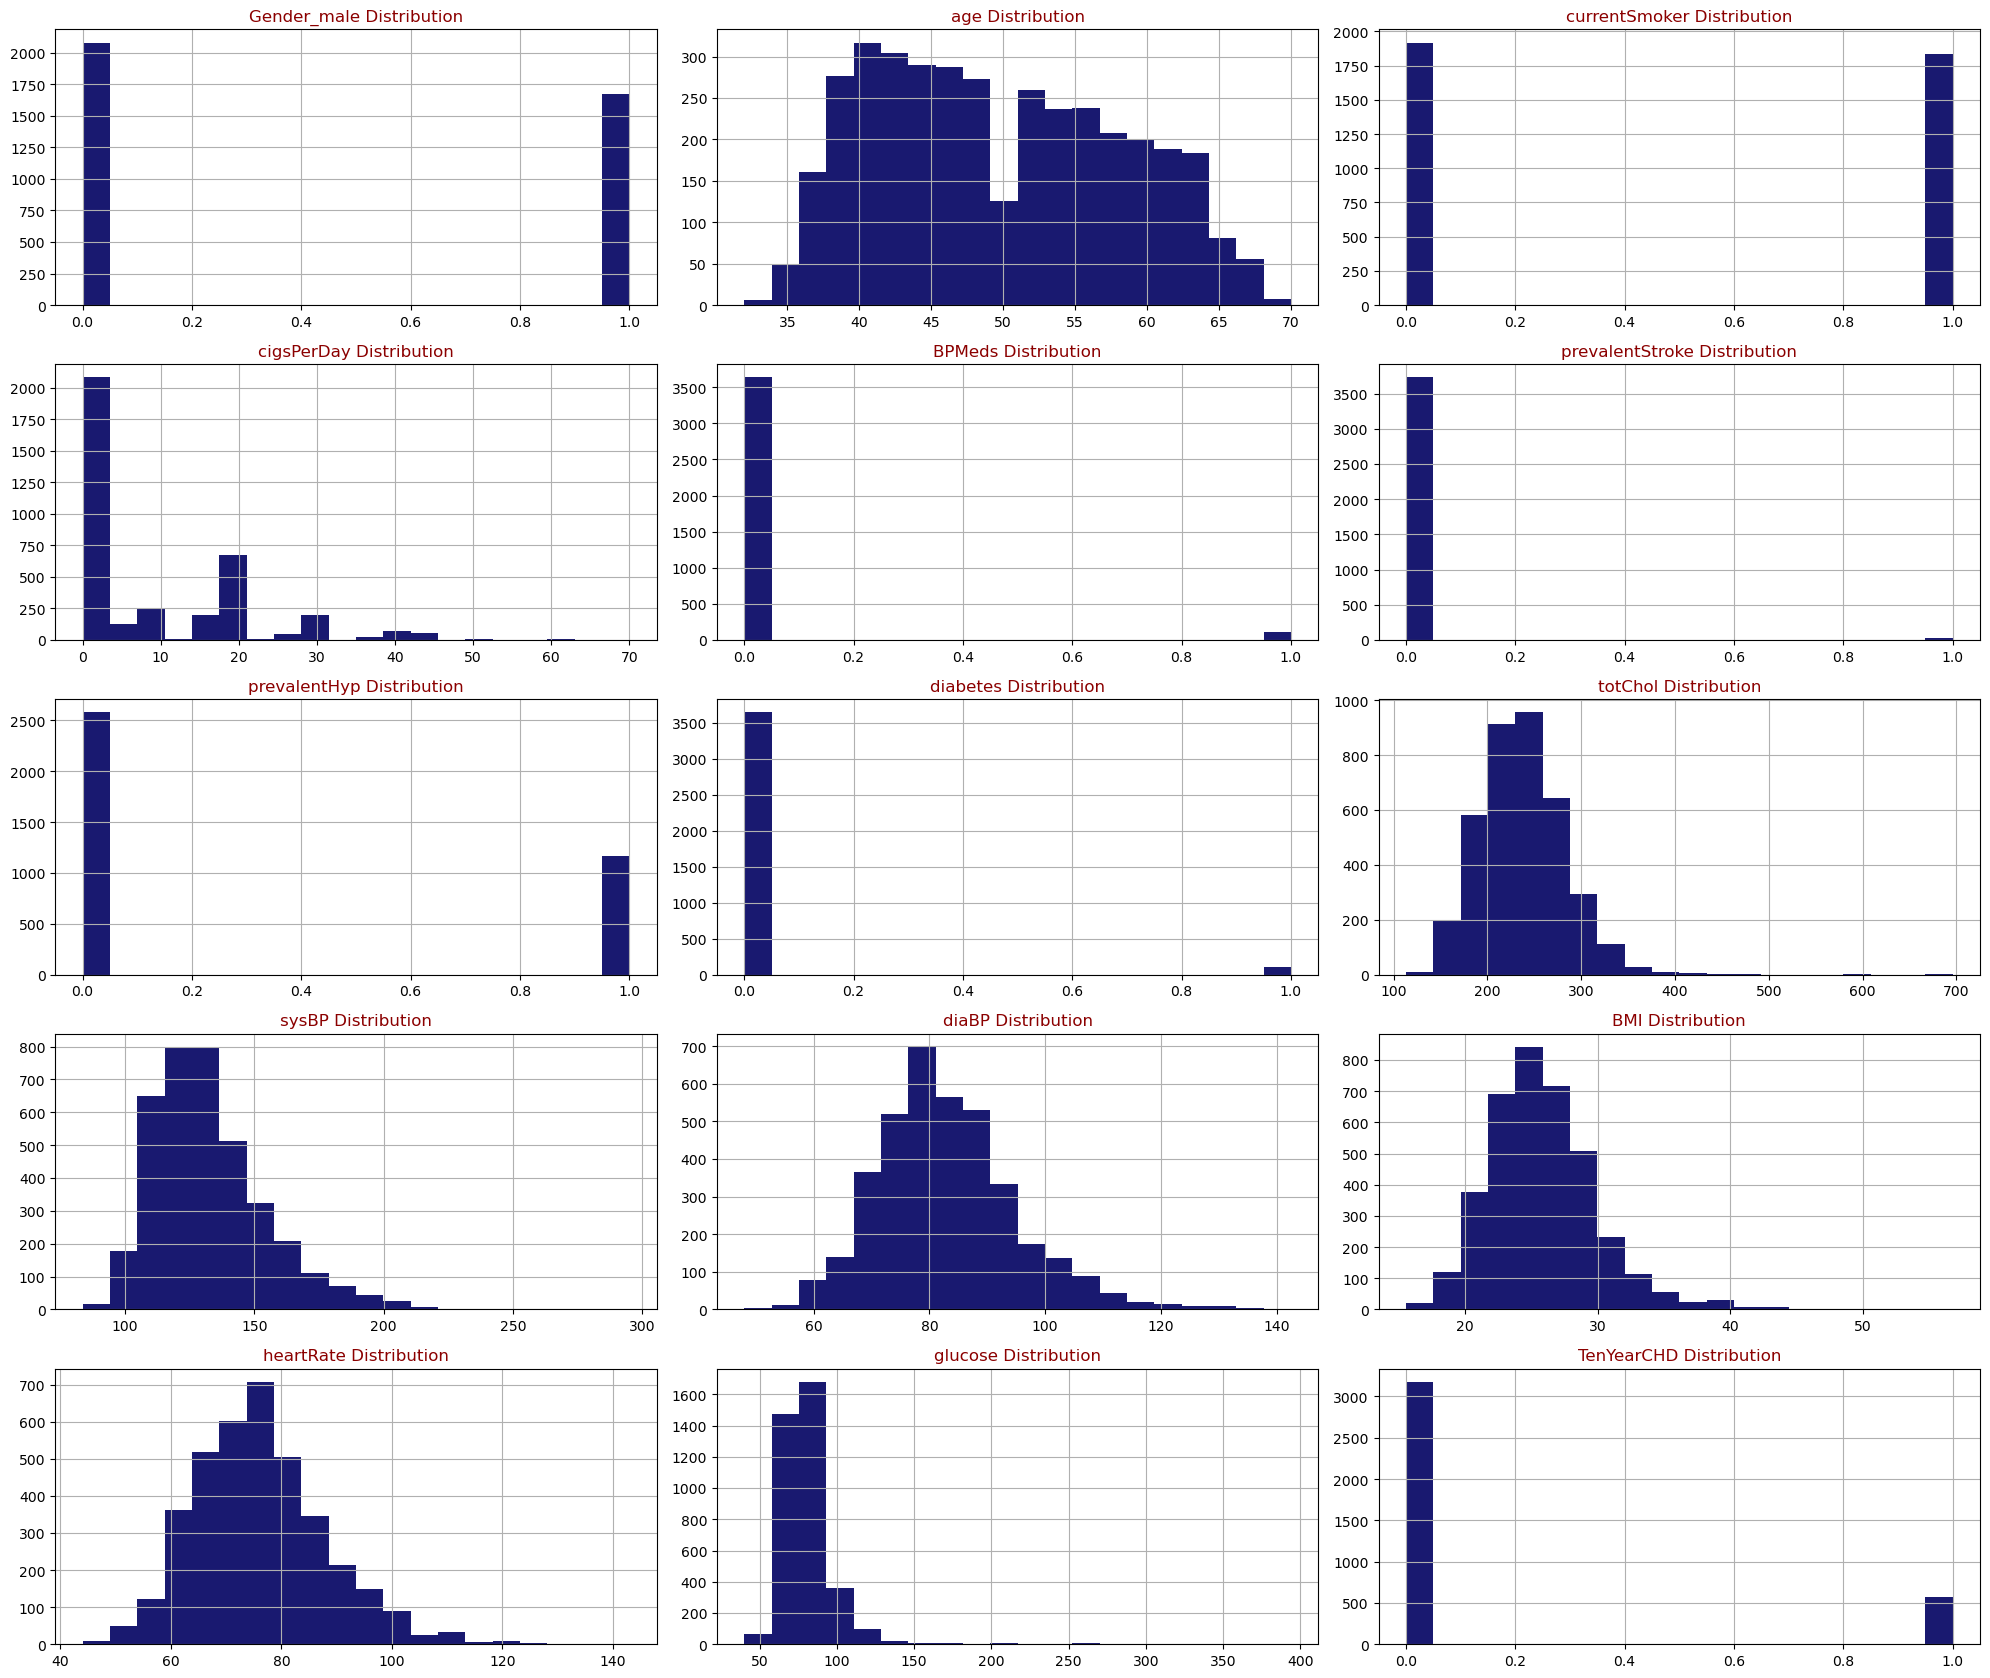

In [17]:
# Exploratory Data Analysis:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution", color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_df, heart_df.columns,6,3)

In [19]:
heart_df.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

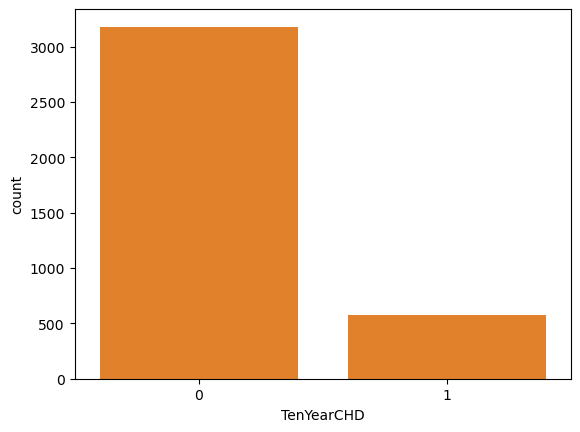

In [21]:
sns.countplot(x = 'TenYearCHD', data = heart_df)
plt.show()

In [22]:
# There are 3179 patients with no heart disease and 572 patients with risk of haert disease.

In [23]:
heart_df.describe()

,Gender_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [24]:
# Logistic Regression:
#Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical
#dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. 
#Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [25]:
#Logistic Regression is one of the basic and popular algorithms to solve a binary classification problems.

#Linear regression is used to solve regression problems with continuous values
#Logistic regression is used to solve classification problems with discrete categories
#Binary classification (Classes 0 and 1)

In [26]:
#Sigmoid Function:
# This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. 
# We use the sigmoid function in order to map predicted values to probability values. 
# This sigmoid function then maps any real value into a probability value between 0 and 1.

In [28]:
# Spliting data into train and test split:
import sklearn 
new_features = heart_df[['age', 'Gender_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose', 'TenYearCHD']]

X = new_features.iloc[:, :-1]
y = new_features.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\sadda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Model Evaluation:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8748335552596538

In [31]:
# Accuracy of the model is 0.88

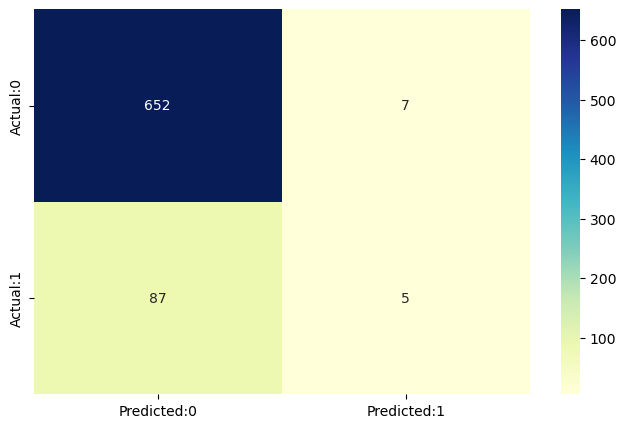

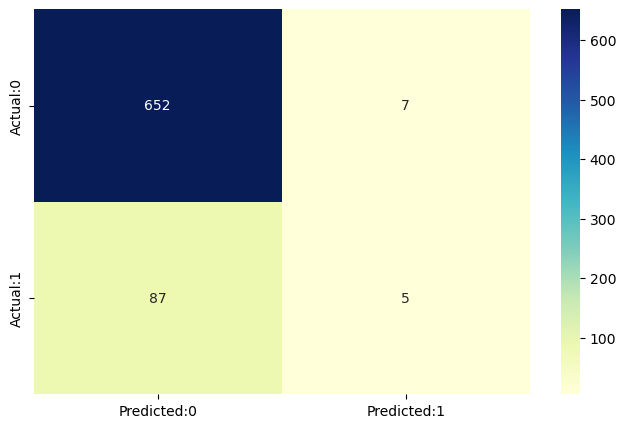

In [33]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap='YlGnBu')

plt.show()

In [34]:
# The confusion matrix shows 652+5 = 657 correct predictions and 87+7=94 is incorrect ones.
# > True Positives: 5
# > True Negative: 652, 
# > False Positive: 7 (Type I Error)
# > False Negative: 87 (Type II Error)

In [35]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [36]:
# Model Evaluation - Statistics:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8748335552596538 
 The Missclassification = 1-Accuracy =  0.12516644474034622 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.05434782608695652 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9893778452200304 
 Positive Predictive value = TP/(TP+FP) =  0.4166666666666667 
 Negative predictive Value = TN/(TN+FN) =  0.8822733423545331 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.116459627329198 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9558048813016804


In [37]:
#From the above statistics it is clear that the model is highly specific than sensitive.
#The negative values are predicted more accurately than the positives.

In [38]:
#Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for 
#the test data with a default classification threshold of 0.5

In [39]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Heart Disease (0)', 'Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of Heart Disease (0),Prob of Heart Disease (1)
0,0.875044,0.124956
1,0.955958,0.044042
2,0.783223,0.216777
3,0.806398,0.193602
4,0.892958,0.107042


In [40]:
y_pred_prob_df.tail()

,Prob of Heart Disease (0),Prob of Heart Disease (1)
746,0.954865,0.045135
747,0.869995,0.130005
748,0.962505,0.037495
749,0.927092,0.072908
750,0.936556,0.063444


In [41]:
#Lower the threshold
#Since the model is predicting Heart disease too many type II errors is not advisable. 
#A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. 
#Hence inorder to increase the sensitivity, threshold can be lowered.

In [45]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,threshold=i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
           'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
           'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[311 348]
 [ 12  80]] 
 with 391 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.8695652173913043 Specificity:  0.47192716236722304 



With 0.2 threshold the Confusion Matrix is  
 [[518 141]
 [ 43  49]] 
 with 567 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.532608695652174 Specificity:  0.7860394537177542 



With 0.3 threshold the Confusion Matrix is  
 [[600  59]
 [ 64  28]] 
 with 628 correct predictions and 64 Type II errors( False Negatives) 

 Sensitivity:  0.30434782608695654 Specificity:  0.9104704097116844 



With 0.4 threshold the Confusion Matrix is  
 [[640  19]
 [ 80  12]] 
 with 652 correct predictions and 80 Type II errors( False Negatives) 

 Sensitivity:  0.13043478260869565 Specificity:  0.9711684370257967 





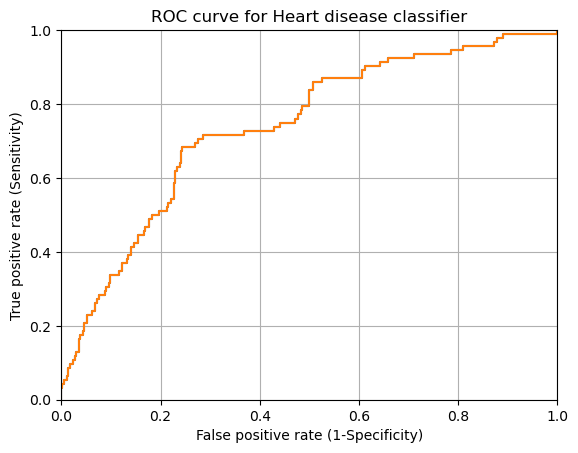

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

plt.show()

In [48]:
#Area Under The Curve (AUC)
#The area under the ROC curve quantifies model classification accuracy; the higher the area, 
#the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset.
#An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible.
#An area of 1 is ideal. The closer the AUC to 1 the better.

In [49]:
sklearn.metrics.roc_auc_score(y_test, y_pred_prob_yes[:,1])

0.7386191198786038

In [50]:
#Conclusions:
#All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction

#Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic
#Blood Pressure also show increasing odds of having heart disease.

#Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) 
#in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)

#The model predicted with 0.88 accuracy. The model is more specific than sensitive.

#The Area under the ROC curve is 73.5 which is somewhat satisfactory.